In [1]:
import pandas as pd
import numpy as np
import pickle

import xgboost as xg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import utils

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv('../data/chi_df_cleaned.csv')
data.head()

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,year,month,week,start_time_ep,end_time_ep,weather_timestamp_ep,accident_duration,side_R,side_nan,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Night,astronomical_twilight_nan,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_nan,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_nan
0,2,42.305960,-87.960150,42.306916,-87.960918,0.077,37.0,31.0,79.0,29.59,10.0,8.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480517e+09,1.480539e+09,1.480518e+09,21600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,42.175870,-88.135770,42.174620,-88.135794,0.086,37.0,28.1,76.0,29.62,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480518e+09,1.480540e+09,1.480518e+09,21600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [4]:
X = data.drop(['severity'], axis=1)
y = data['severity']

In [5]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
X_train.head()

,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,year,month,week,start_time_ep,end_time_ep,weather_timestamp_ep,accident_duration,side_R,side_nan,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Night,astronomical_twilight_nan,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_nan,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_nan
781,42.25602,-88.15199,42.26149,-88.15439,0.397,18.0,9.8,88.0,29.85,0.8,5.800000,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,2016,12,50,1.481913e+09,1.481935e+09,1.481913e+09,21600.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17045,41.57765,-87.56348,41.57765,-87.56348,0.000,91.0,91.0,38.0,29.17,10.0,10.003125,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,6,22,1.591119e+09,1.591121e+09,1.591119e+09,1800.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [7]:
X['wind_direction_Calm'].value_counts()

0    39363
1     1611
Name: wind_direction_Calm, dtype: int64

In [8]:
X_test.head()

,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,year,month,week,start_time_ep,end_time_ep,weather_timestamp_ep,accident_duration,side_R,side_nan,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Night,astronomical_twilight_nan,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_nan,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_nan
32814,41.929409,-88.022481,41.929409,-88.022481,0.000,60.1,60.1,42.0,29.94,10.0,6.9,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018,4,14,1.523451e+09,1.523452e+09,1.523451e+09,1800.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19315,41.699890,-88.030280,41.699890,-88.030280,0.000,85.0,85.0,57.0,29.07,10.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,2020,6,25,1.593268e+09,1.593271e+09,1.593268e+09,2700.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26

In [9]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (30730, 154)
y_train shape: (30730,)
X_test shape: (10244, 154)
y_test shape: (10244,)


In [10]:
y.value_counts(normalize=True)

3    0.507615
2    0.412481
4    0.073827
1    0.006077
Name: severity, dtype: float64

In [11]:
xg_model = xg.sklearn.XGBClassifier()
xg_model.fit(X_train,y_train);

[15:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [12]:
# print out our accuracy scores
print('XGBoost Training Accuracy:', xg_model.score(X_train,y_train))
print('XGBoost Testing Accuracy:', xg_model.score(X_test,y_test))

XGBoost Training Accuracy: 0.9131142206313049
XGBoost Testing Accuracy: 0.8485942991019133


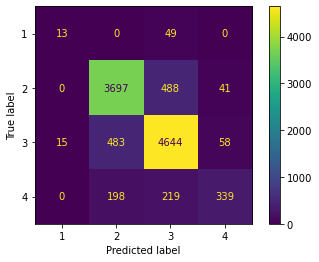

In [13]:
plot_confusion_matrix(xg_model, X_test, y_test)

In [14]:
xg_preds = xg_model.predict(X_test)

In [15]:
pd.DataFrame(xg_preds).value_counts(normalize=True)

3    0.527138
2    0.427372
4    0.042757
1    0.002733
dtype: float64

In [16]:
f1_score(y_test,xg_preds,average='weighted')

0.8429581173205083

In [17]:
# decision tree model with just a few hyperparameters
tree = DecisionTreeClassifier(max_depth=8, min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=5)

In [18]:
print('Decision Tree Training Accuracy:', tree.score(X_train,y_train))
print('Decision Tree Testing Accuracy:', tree.score(X_test,y_test))

Decision Tree Training Accuracy: 0.7988935893263911
Decision Tree Testing Accuracy: 0.7885591565794612


In [19]:
tree_coefs = pd.DataFrame(zip(X_train.columns, tree.feature_importances_), columns=['feature','coefficient'])
tree_coefs[tree_coefs['coefficient'] > 0][:15].sort_values(by='coefficient', ascending=False)

,feature,coefficient
4,distance(mi),0.052296
27,week,0.013859
3,end_lng,0.013070
2,end_lat,0.008849
23,traffic_signal,0.005523
0,start_lat,0.005362
1,start_lng,0.005043
8,pressure(in),0.004420
6,wind_chill(f),0.002668
5,temperature(f),0.001124


In [20]:
forrest = RandomForestClassifier(max_depth=10)
forrest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [21]:
print('Random Forrest Training Accuracy:', forrest.score(X_train,y_train))
print('Random Forrest Testing Accuracy:', forrest.score(X_test,y_test))

Random Forrest Training Accuracy: 0.7999674585095997
Random Forrest Testing Accuracy: 0.7868996485747755


In [22]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [23]:
print('BAG Training Accuracy:', bag.score(X_train,y_train))
print('BAG Testing Accuracy:', bag.score(X_test,y_test))

BAG Training Accuracy: 0.9875366091767003
BAG Testing Accuracy: 0.8376610698945725


In [24]:
with open('./models/BAG.pkl', mode='wb') as pickle_out:
    pickle.dump(bag, pickle_out)

In [25]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [26]:
y_train_cat = utils.to_categorical(y_train-1, 4)
y_test_cat = utils.to_categorical(y_test-1, 4)

In [27]:
y_test_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [28]:
nn = Sequential()

nn.add(
    Dense(
        128,
        activation = 'relu'
    )
)

nn.add(Dropout(.4))

nn.add(
    Dense(
        64,
        activation = 'relu'
    )
)

nn.add(Dropout(.3))

nn.add(
    Dense(
        32,
        activation = 'relu'
    )
)

nn.add(Dropout(.2))

nn.add(
    Dense(
        16,
        activation = 'relu'
    )
)

nn.add(Dropout(.1))

nn.add(
    Dense(
        8,
        activation = 'relu'
    )
)

nn.add(
    Dense(
        4,
        activation = 'softmax'
    )
)

nn.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [30]:
history = nn.fit(
    X_train_sc, 
    y_train_cat,
    validation_data=(X_test_sc, y_test_cat),
    epochs = 512,
    verbose = 0
)

In [31]:
max(history.history['accuracy']),max(history.history['val_accuracy'])

(0.8338119983673096, 0.8091834783554077)

In [37]:
nn.save('./models/neural_net')

INFO:tensorflow:Assets written to: ./models/neural_net\assets
